# Astropy tutorial: putting it all together

In this tutorial we'll learn how to use some of the features of `astropy` as well as the `astroquery` library.

## Astroquery
`astroquery` is a handy python library for accessing information from the online **Simbad** and **Vizier** databases.

Let's first load the **Simbad** interface and send a query for your favorite object.

In [1]:
from astroquery.simbad import Simbad
import astropy.units as u

In [2]:
result = Simbad.query_object("Barnard's Star")
result

MAIN_ID,RA,DEC,RA_PREC,DEC_PREC,COO_ERR_MAJA,COO_ERR_MINA,COO_ERR_ANGLE,COO_QUAL,COO_WAVELENGTH,COO_BIBCODE
,"""h:m:s""","""d:m:s""",,,mas,mas,deg,,,
object,str13,str13,int16,int16,float32,float32,int16,str1,str1,object
NAME Barnard's star,17 57 48.4997,+04 41 36.111,14,14,0.223,0.304,90,A,O,2018yCat.1345....0G


In [3]:
type(result)

astropy.table.table.Table

You'll see that this query returns an object with several columns but a single row. This object is in fact an `astropy.table` object. To access columns in this table, you can use the following commands.

In [4]:
result[0].columns

<TableColumns names=('MAIN_ID','RA','DEC','RA_PREC','DEC_PREC','COO_ERR_MAJA','COO_ERR_MINA','COO_ERR_ANGLE','COO_QUAL','COO_WAVELENGTH','COO_BIBCODE')>

In [5]:
result[0]["RA"], result[0]["DEC"]

('17 57 48.4997', '+04 41 36.111')

In [6]:
result[0]["RA"]

'17 57 48.4997'

Exercise: Use the RA and Dec columns from the table to create a SkyCoord object

In [7]:
from astropy.coordinates import SkyCoord

In [8]:
SkyCoord(ra=result[0]["RA"], dec=result[0]["DEC"], unit=(u.hourangle, u.deg))


<SkyCoord (ICRS): (ra, dec) in deg
    (269.45208208, 4.69336417)>

Let's import the `Vizier` module from `astroquery`.

In [9]:
from astroquery.vizier import Vizier

Exercise: Use the `find_catalogs` method from `Vizier` to search for the GAIA DR2 catalog.

In [10]:
print(Vizier.find_catalogs("GAIA DR2"))

OrderedDict([('I/345', </>), ('I/347', </>), ('I/348', </>), ('IV/35', </>), ('IV/36', </>), ('J/A+A/616/A12', </>), ('J/A+A/616/A37', </>), ('J/A+A/616/L2', </>), ('J/A+A/616/L15', </>), ('J/A+A/617/A135', </>), ('J/A+A/618/A44', </>), ('J/A+A/618/A56', </>), ('J/A+A/618/A93', </>), ('J/A+A/619/A8', </>), ('J/A+A/619/A106', </>), ('J/A+A/619/A155', </>), ('J/A+A/619/A180', </>), ('J/A+A/619/L8', </>), ('J/A+A/620/A91', </>), ('J/A+A/620/A128', </>), ('J/A+A/620/A141', </>), ('J/A+A/620/A155', </>), ('J/A+A/620/A172', </>), ('J/A+A/621/A38', </>), ('J/A+A/621/A48', </>), ('J/A+A/621/L2', </>), ('J/A+A/621/L3', </>), ('J/A+A/622/A60', </>), ('J/A+A/622/A165', </>), ('J/A+A/622/L13', </>), ('J/A+A/623/A22', </>), ('J/A+A/623/A25', </>), ('J/MNRAS/482/4570', </>), ('J/MNRAS/482/5138', </>), ('J/MNRAS/484/2832', </>)])


This query returns many catalogs that use the GAIA DR2 data. The catalog we are interested is I/345.

Exercise: Use the `Vizier.query_region` method to query the GAIA DR2 catalog (I/345) for objects within 0.1 degrees around Barnard's Star.

In [11]:
result = Vizier.query_region("Barnard's Star", radius=0.1*u.deg, catalog="I/345")
result

TableList with 2 tables:
	'0:I/345/gaia2' with 32 column(s) and 50 row(s) 
	'1:I/345/rvstdcat' with 32 column(s) and 1 row(s) 

You will see that this query returned two results, the gaia2 catalog, as well as the catalog with radial velocity standards. At this point we are only interested in the first catalog. Unfortunately, the first catalog only has 50 rows, because this is the `Vizier` standard. To remove this limit, set `Vizier.ROW_LIMIT = -1`. Be aware that this may mean you will be downloading a large amount of data. Rerun the query with the new limit.

In [12]:
Vizier.ROW_LIMIT = -1
result = Vizier.query_region("Barnard's Star", radius=0.1*u.deg, catalog="I/345/gaia2")
result

TableList with 1 tables:
	'0:I/345/gaia2' with 32 column(s) and 2336 row(s) 

This result contains the following columns:

In [13]:
data = result[0]
data.columns

<TableColumns names=('RA_ICRS','e_RA_ICRS','DE_ICRS','e_DE_ICRS','Source','Plx','e_Plx','pmRA','e_pmRA','pmDE','e_pmDE','Dup','FG','e_FG','Gmag','e_Gmag','FBP','e_FBP','BPmag','e_BPmag','FRP','e_FRP','RPmag','e_RPmag','BP-RP','RV','e_RV','Teff','AG','E_BP-RP_','Rad','Lum')>

A cool feature of this table is that it contains information about the unit of each column.

In [15]:
print(data["RA_ICRS"].unit)
print(data["pmRA"].unit)

deg
mas / yr


Exercise: use the RA and DEC columns to define `SkyCoord` objects for the entire table, now using the table units.

In [17]:
columns = data["RA_ICRS"], data["DE_ICRS"]
p = SkyCoord(ra=columns[0], dec=columns[1], frame="icrs", unit=(columns[0].unit, columns[1].unit))

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

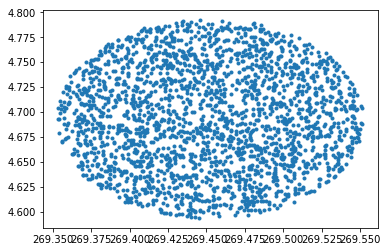

In [22]:
plt.plot(p.ra, p.dec, '.')

In [ ]:
c = data["e_RPmag"]<0.01

In [ ]:
fig, ax = plt.subplots()
ax.plot(data["BP-RP"][c], data["RPmag"][c], '.', alpha=0.1)

In [ ]:
plt.plot(data["pmRA"], data["pmDE"], '.')
#plt.xlim(-1000, 1000)
#plt.ylim(-1000, 1000)

In [ ]:
c = data["RV"]>0
data["RV"][c]

In [ ]:
d = Distance(parallax=data["Plx"], allow_negative=True)

In [ ]:
SkyCoord(ra=1*u.deg, dec=2*u.deg, pm_ra_cosdec=2*u.mas/u.yr, pm_dec=1*u.mas/u.yr)

In [ ]:
p = SkyCoord(ra=data["RA_ICRS"], dec=data["DE_ICRS"], distance=d)

In [ ]:
p